In [1]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df

Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
5       Male  67.253016  152.212156
6       Male  68.785081  183.927889
7       Male  68.348516  167.971110
8       Male  67.018950  175.929440
9       Male  63.456494  156.399676
10      Male  71.195382  186.604926
11      Male  71.640805  213.741169
12      Male  64.766329  167.127461
13      Male  69.283070  189.446181
14      Male  69.243732  186.434168
15      Male  67.645620  172.186930
16      Male  72.418317  196.028506
17      Male  63.974326  172.883470
18      Male  69.640060  185.983958
19      Male  67.936005  182.426648
20      Male  67.915050  174.115929
21      Male  69.439440  197.731422
22      Male  66.149132  149.173566
23      Male  75.205974  228.761781
24      Male  67.893196  162.006652
25      Male  68.144033  192.343977
26      Male  69.089631  184.435174
27      Male  72.800844  206.828189
28      Male  67.421242  175.213922
29      Male  68.496415  154.342639
...      ...        ...         ...
9970  Female  65.618737  151.500389
9971  Female  64.640247  155.318297
9972  Female  60.653733  123.084293
9973  Female  60.737031  120.926500
9974  Female  65.393947  143.017835
9975  Female  66.251923  124.019917
9976  Female  61.475904  121.387236
9977  Female  64.494838  149.402547
9978  Female  57.375759  114.192209
9979  Female  62.056012  125.135897
9980  Female  60.472262  110.768229
9981  Female  60.443264  135.559390
9982  Female  69.868511  177.992066
9983  Female  65.830726  132.827889
9984  Female  59.047029  111.707369
9985  Female  68.041065  170.514213
9986  Female  63.352698  141.906510
9987  Female  65.610243  151.169475
9988  Female  59.538729  121.244876
9989  Female  60.955084   95.686674
9990  Female  63.179498  141.266100
9991  Female  62.636675  102.853563
9992  Female  62.077832  138.691680
9993  Female  60.030434   97.687432
9994  Female  59.098250  110.529686
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]

In [4]:
X=df[['Height']].values #x hamara input ha y_truue hamara output hoga 
y_true=df[['Weight']].values #values na bi lagye tu chala ga q ka value numpyarray ma convert karta ha humara pass series ka data ha jo already numpy array ma hga 

In [5]:
def line(x, w=0, b=0):
    y=w*x+b  #y=mx+c
    return  y


In [6]:
#Cost Function iskoo lost function bi bolta ha 
def mean_squared_error(y_true, y_pred):
    s=(y_true-y_pred)**2
    return np.sqrt(s.mean()) # finally is value ko mean square error kahata ha is error ko kam sa kam karna hota ha aur accuracy barhani hoti ha 
#mean square error ma hoga ya ka y_true jo output hoga usma sa predict value minus karaga aur uska square laga aur jo aye ga uska mean aur square value hoti ha tu last square root laga 



Text(0.5, 0, 'b')

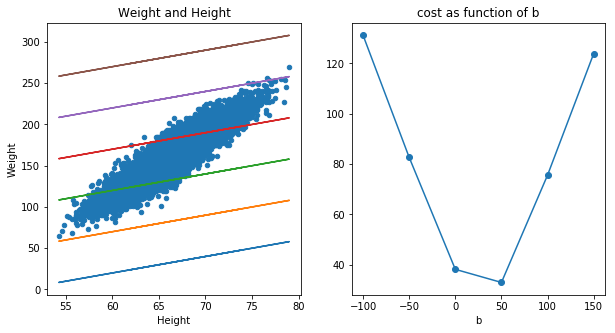

In [13]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)
df.plot(kind='scatter',x='Height',y='Weight',title='Weight and Height',ax=ax1)
bs=np.array([-100,-50,0,50,100,150]) # ta biase ha jo ma khud random rakh ka dakh raha ho tu error bhot araha ha  
mses=[]
for b in bs:
    y_pred=line(X, w=2,b=b)
    mse=mean_squared_error(y_true,y_pred)
    mses.append(mse)
    plt.plot(X,y_pred)
    
ax2=plt.subplot(122)
plt.plot(bs,mses,'o-')
plt.title('cost as function of b') #mean loss nikal raha ha
plt.xlabel('b')
    
#2nd figure ma hum dakh sakta ha loss kam atata mana value zada dali tu bhot barhgaya ha 
    

In [14]:
#STRAIGHT LINE USING NEURAL NETWORK

In [15]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [16]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [17]:
model.fit(X,y_true, epochs=40)


Epoch 1/40
10000/10000 [==============================] - 2s 184us/step - loss: 647.6774
Epoch 2/40
10000/10000 [==============================] - 1s 60us/step - loss: 561.5331
Epoch 3/40
10000/10000 [==============================] - 1s 53us/step - loss: 474.8347
Epoch 4/40
10000/10000 [==============================] - 1s 56us/step - loss: 439.2545
Epoch 5/40
10000/10000 [==============================] - 0s 47us/step - loss: 380.1343
Epoch 6/40
10000/10000 [==============================] - 0s 43us/step - loss: 357.3038
Epoch 7/40
10000/10000 [==============================] - 0s 43us/step - loss: 308.6987
Epoch 8/40
10000/10000 [==============================] - 0s 44us/step - loss: 287.4929
Epoch 9/40
10000/10000 [==============================] - 0s 43us/step - loss: 259.4195
Epoch 10/40
10000/10000 [==============================] - 1s 65us/step - loss: 243.8553
Epoch 11/40
10000/10000 [==============================] - 1s 60us/step - loss: 218.5338
Epoch 12/40
10000/10000 [===

In [21]:
y_pred=model.predict(X)
len(y_pred)

10000

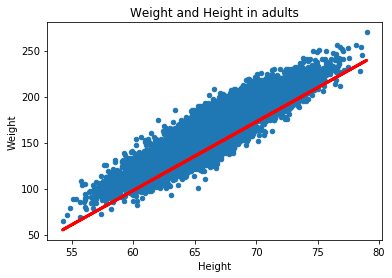

In [19]:
df.plot(kind='scatter',
       x='Height',
       y='Weight', title='Weight and Height in adults')
plt.plot(X, y_pred, color='red', linewidth=3)